## Multiclass Classification (Logistic Regression)

Here we want to identify hand written digits: we map a digit with a set of output whihc is [0-1-2-3-4-5-6-7-8-9]. So We'll use a training se with lots of hand digit charaters and then we'll build a model using Logistic Regression (LR).

In [4]:
# Here we import matplots and digits from siket learn. So sklean has some free ready math datasets 
# that you can use to learn machine learning, from these we're using load_digits dataset:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [5]:
# To load the dataset, we call load_digits method:
digits = load_digits()

In [6]:
# This dataset cotain couple of things: 1) It has data which is your real data:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
# Let's print some values, as if you see the documentation of this dataset, it contains 1797 (8*8) samples.
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

* So as we see, we displayed the first element which is nothing but an array. In reality it's 8 * 8 image which is represented by 1-D array. So if we count the element of the array, it will be 64 bits array (8*8).

<Figure size 432x288 with 0 Axes>

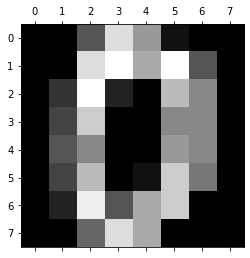

In [8]:
# If we want to see this particular image:
# digit.data has the actual data and digit.images has the actual images.
plt.gray()
plt.matshow (digits.images[0])

<Figure size 432x288 with 0 Axes>

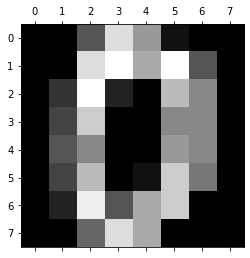

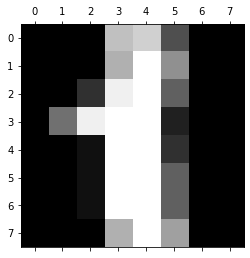

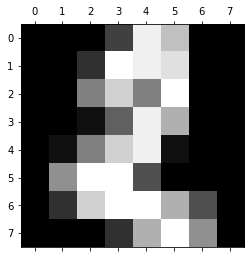

In [10]:
# Let's print first three samples:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [12]:
# digits.target show you the actual number of images, see we printed the first 3 images, now through target we can specify 
# whihc numbers they are:
digits.target[0:3]

array([0, 1, 2])

* So as we see the images are [ 0 - 1 - 2 ]. 
* So we can use digits.data and digits.target to train the model.

In [25]:
# So now before training the model we import the train_test_split method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [26]:
# To see the length of train dataset:
len(X_train)

1437

In [27]:
# To see the length of test data:
len(X_test)

360

In [28]:
# Now we have train and test data, the next step is to create a Logistic Regression model:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

In [29]:
# The next step is to train the model using fit() method:
lreg.fit(X_train, y_train)

C:\Users\Habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* So now the model is trained. Again to repeat the X_train has the hand written characters and the y_train has the corresponding output (for example: for image-4 the y_train will be 4.)

In [30]:
# Now let's see the model accuracy by using 'score' method: So using the X_test it will calculate the y-predicted value and
# it will compare those y-predicted values with the real values which is t_test.
lreg.score(X_test, y_test)

0.9694444444444444

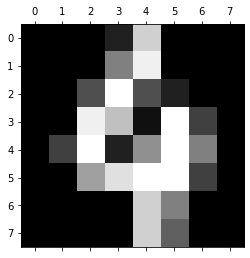

In [39]:
# Before predicting the actual output, let's pickup a random sample:
plt.matshow(digits.images[100])

In [40]:
# Now let's see what this number is:
digits.target[100]

4

In [42]:
# Now let's see what our model will predict for this numbers:
# Here we're not supplying images here, because images are binary data and our model likes numeric data more...
# For using the same index [100] we are using data:
lreg.predict([digits.data[100]])

array([4])

In [44]:
# Now let's predict [0:3]:
lreg.predict(digits.data[0:3])

array([0, 1, 2])

* So as you see the model is predicting the target values alright.

In [45]:
# Now, let's see where my model is doing wrong, till now when I'm trying every value, it's giving me the correct answer. But
# We see the accuracy of our model is 0.96, means my model will get 0.34 mistakes. 
# One way of analyzing the model is confusion matrix. let's import it:
from sklearn.metrics import confusion_matrix

In [47]:
# Now we need to get the predicted values:
# Then in the confusion matrix we supply y_test which is the truth, and then y_predicted which is predicted by our model:
y_predicted = lreg.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 27,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 30,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  0, 33]], dtype=int64)

Text(69.0, 0.5, 'Truth')

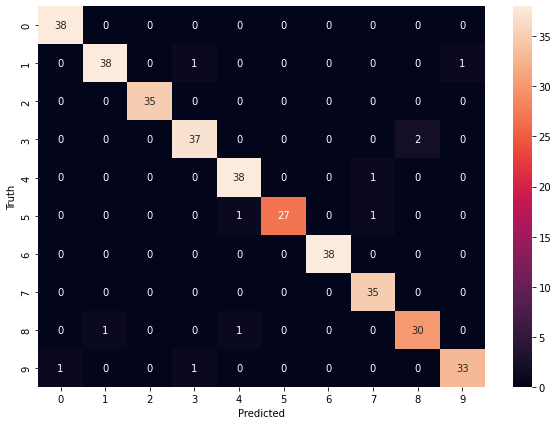

In [50]:
# For better visualization of confusion matrix, let's use matplotlib or seaborn:
# seaborn library is similar with matplotlib, used for visualization purpose. Then we're calling heatmap method with the 
# confusion matrix 'cm' vairable that we created before.
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Now let's see the 10th row and 1st column where we have 1. So this 1 means that the truth was that this should be 9, but our model get mistake and predicted that no it's 0. Similarly for the 4th row and 9th column we see 2. This means that two times the actual value was 3, but my model get mistakes and predicted to be 8.
* Confusion matrix is an excellent ways of visualizaing how well our model is doing.

### Exercise
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

    1) Sepal Length
    2) Sepal Width
    3) Petal Length
    4) Petal Width
Using above 4 features you will clasify a flower in one of the three categories,

    1. Setosa
    2. Versicolour
    3. Virginica

<img src="iris_petal_sepal.png" width=400 height=400 />

In [130]:
# First of all let's load the dataset:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

In [120]:
# Now let's see what we have in this dataset:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [121]:
# To see the shape of dataset:
iris.data.shape

(150, 4)

In [107]:
# To see the features names:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
# Let's check what is the first item:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

* So it's giving us the width and lenght of Sepal and Petal.

In [98]:
iris.target[49]

0

In [99]:
iris.target[67]

1

In [100]:
iris.target[110]

2

In [84]:
# Let's see the targets:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [122]:
# To see the target names (include categories):
iris.target_names[:]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [131]:
# So now to split the dataset into train and test, we call to train_test_split method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.1)

In [132]:
# So the data is splited. Now to see the lenght of train dataset:
len(X_train)

135

In [133]:
# And to see the lenght of test samples:
len(X_test)

15

In [134]:
# The next step is to create a Logistic Regression model:
from sklearn.linear_model import LogisticRegression
lrege = LogisticRegression()

In [135]:
# The next step is to train the model:
lrege.fit(X_train, y_train)

C:\Users\Habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
# Now the model is trained. Let's see the model accuracy:
lrege.score(X_test, y_test)

1.0

* Yessssssssss! As we have small dataset, so the model accuracy is 100%.

In [137]:
# Now let's see the confusion matrix:
ye_predicted = lrege.predict(X_test)
cme = confusion_matrix(y_test, ye_predicted)
cme

array([[1, 0, 0],
       [0, 6, 0],
       [0, 0, 8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

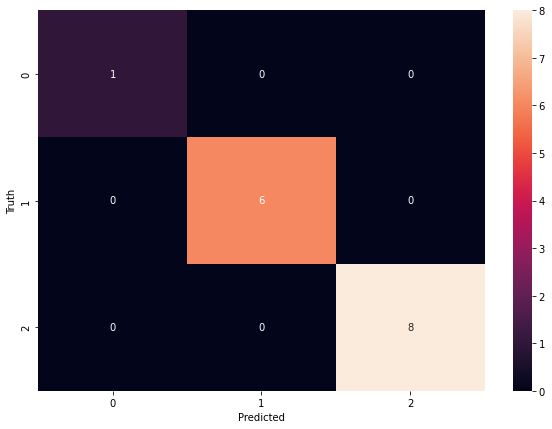

In [138]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cme, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

* Thats were all about logistic Regression ...